In [38]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import numpy as np

In [40]:
from descent.figure2d import Quadratic2D
from descent.figure3d import Quadratic3D, Cubic3D, Multitrous3D, QuadraticN, Rosenbrock
from descent.functions import create_system
from descent.gradient import GradientDescentConstant, GradientDescentOptimalStep
from descent.gradient import GradientDescentL1Optimisation

# Quadratic 2D

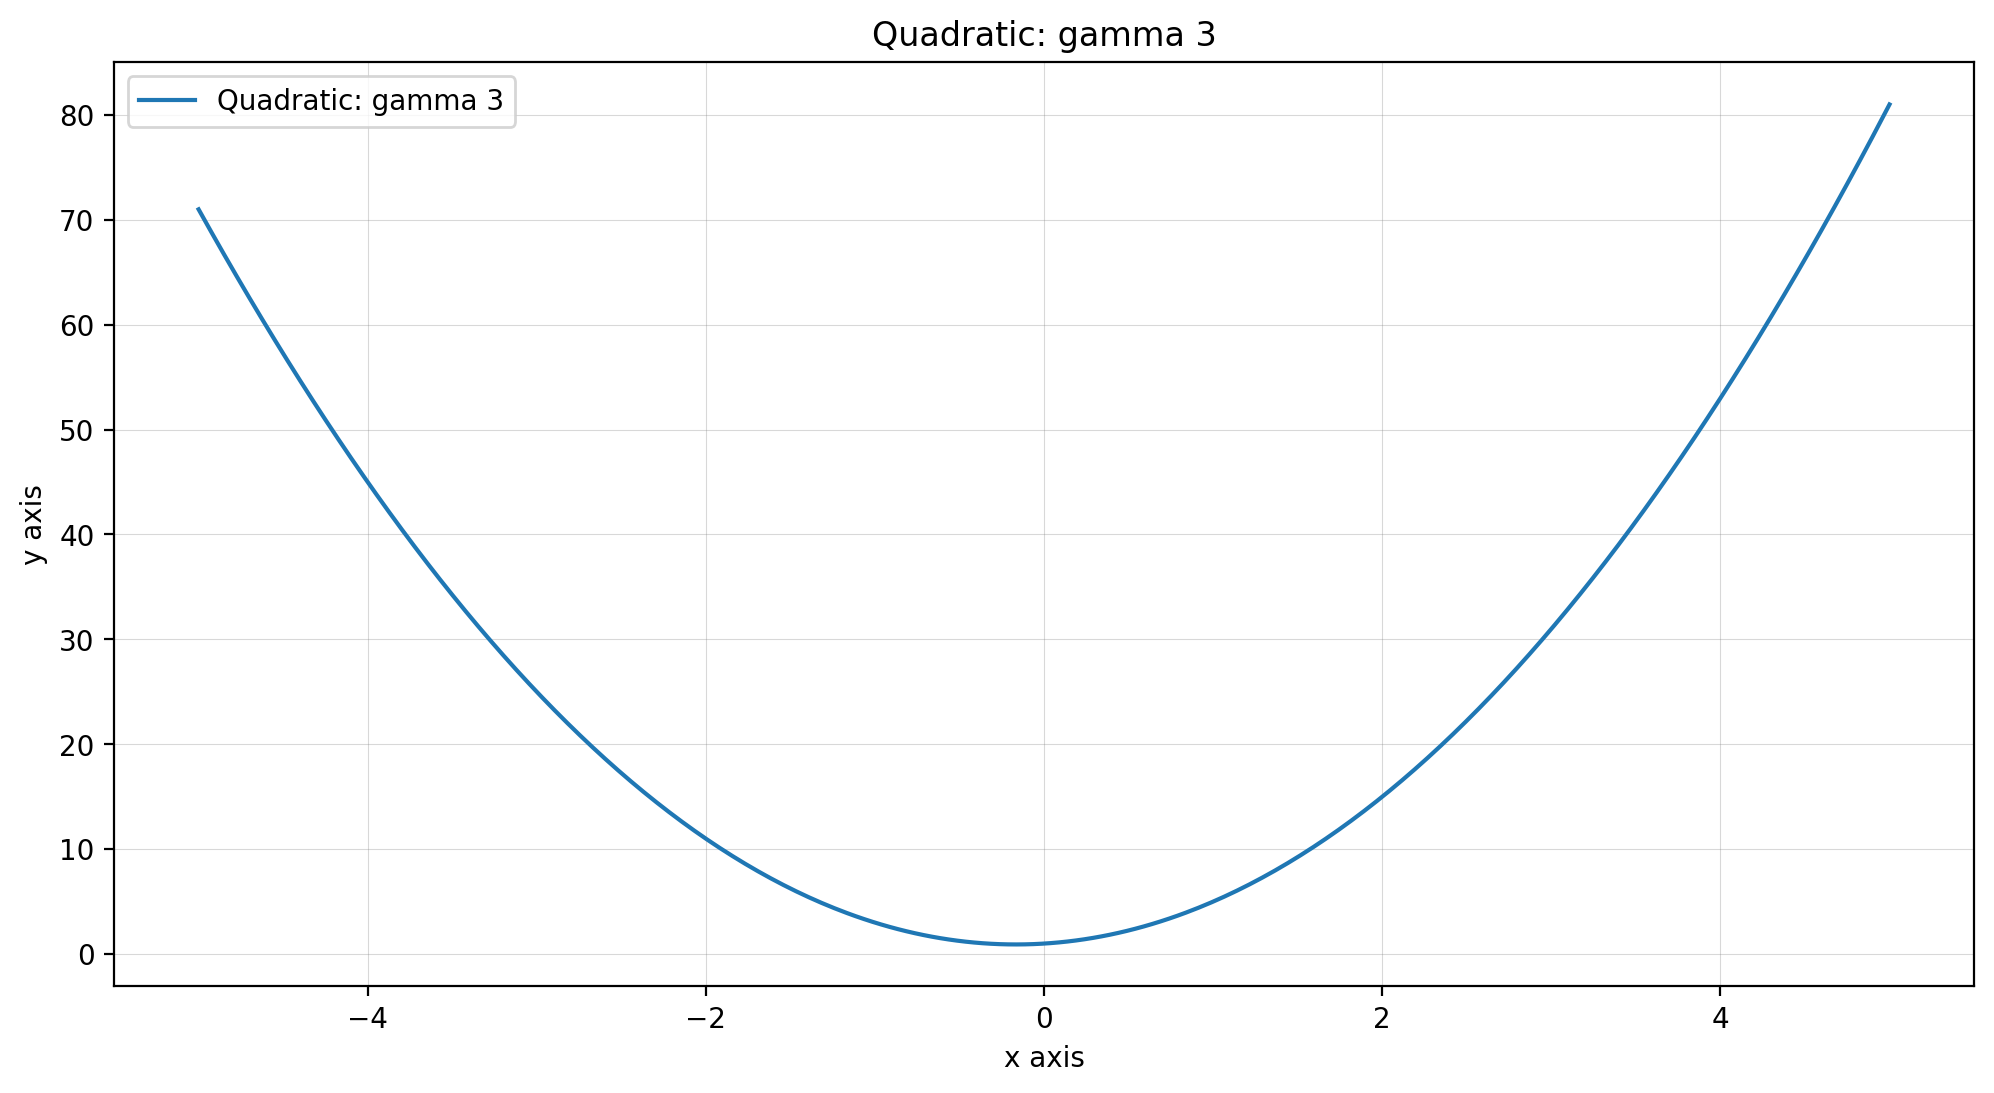

In [41]:
quadratic_2d = Quadratic2D(3)
quadratic_2d.figure()

# Quadratic 3D

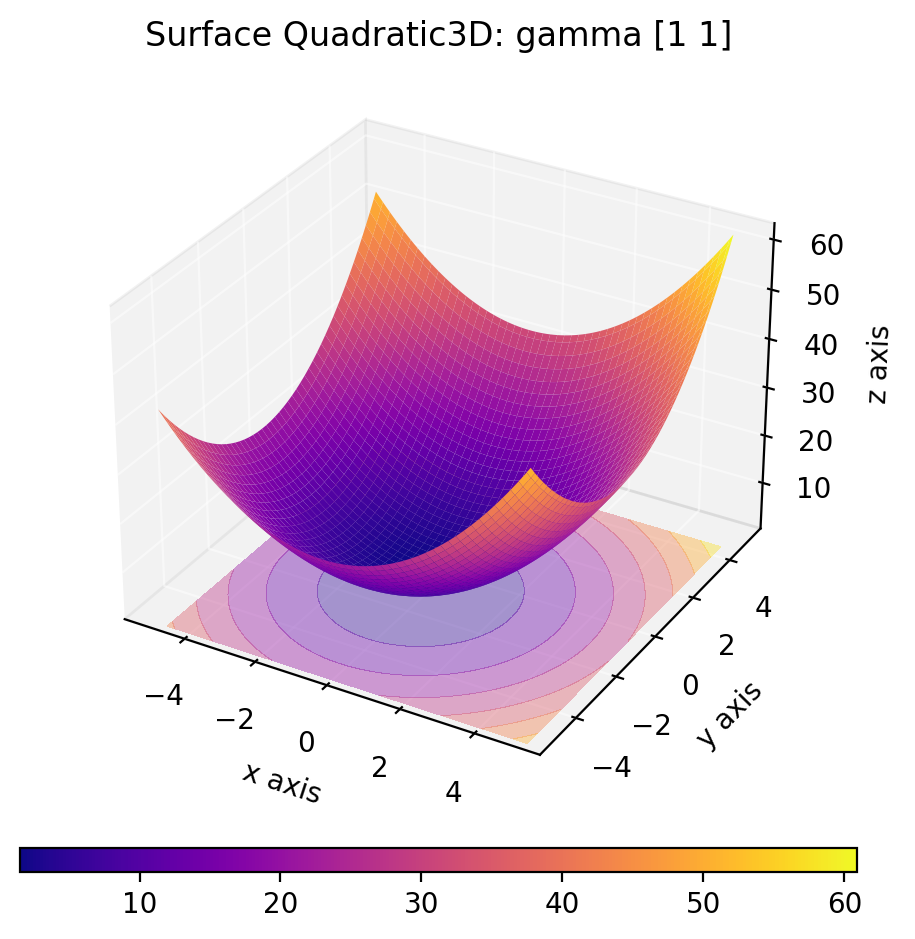

In [42]:
quadratic_3d = Quadratic3D()
quadratic_3d.figure()

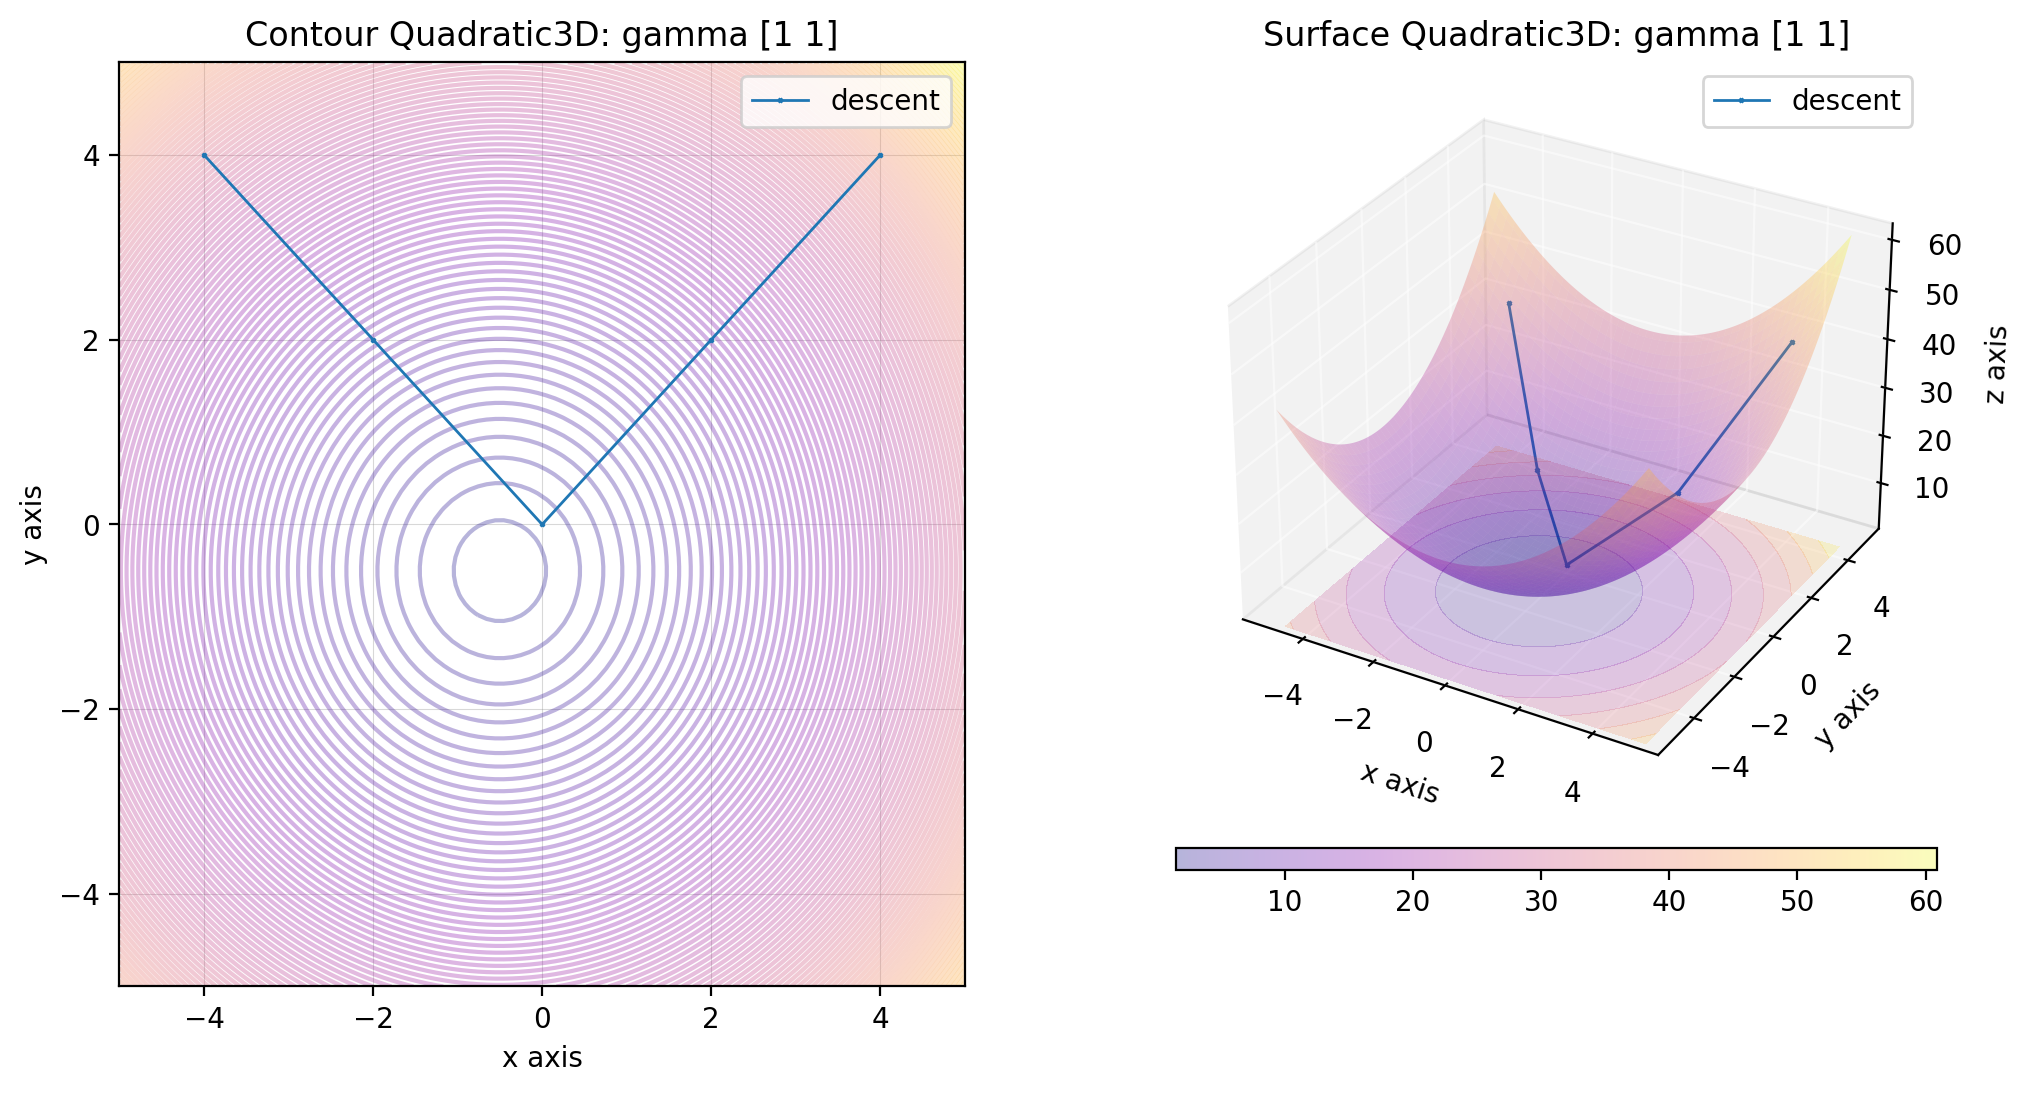

In [43]:
descent = {
    "descent": np.array([[-4, 4], [-2, 2], [0, 0], [2, 2], [4, 4]])
}
quadratic_3d.figure(descent=descent, plot_contour=True)

# Cubic 3D

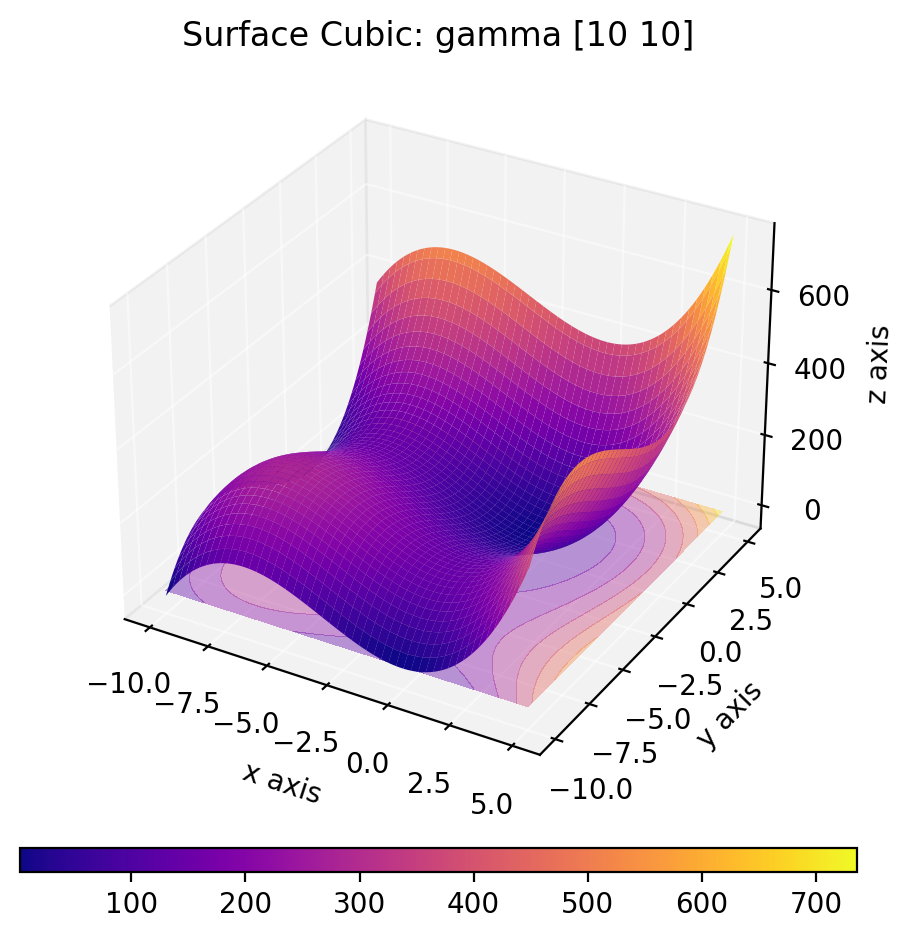

In [44]:
cubic_3d = Cubic3D(np.array([10, 10]))
x = np.linspace(-10, 5, 100)
X = np.stack((x, x), axis=-1)
cube = cubic_3d.figure(X)

# Multitrous 3D

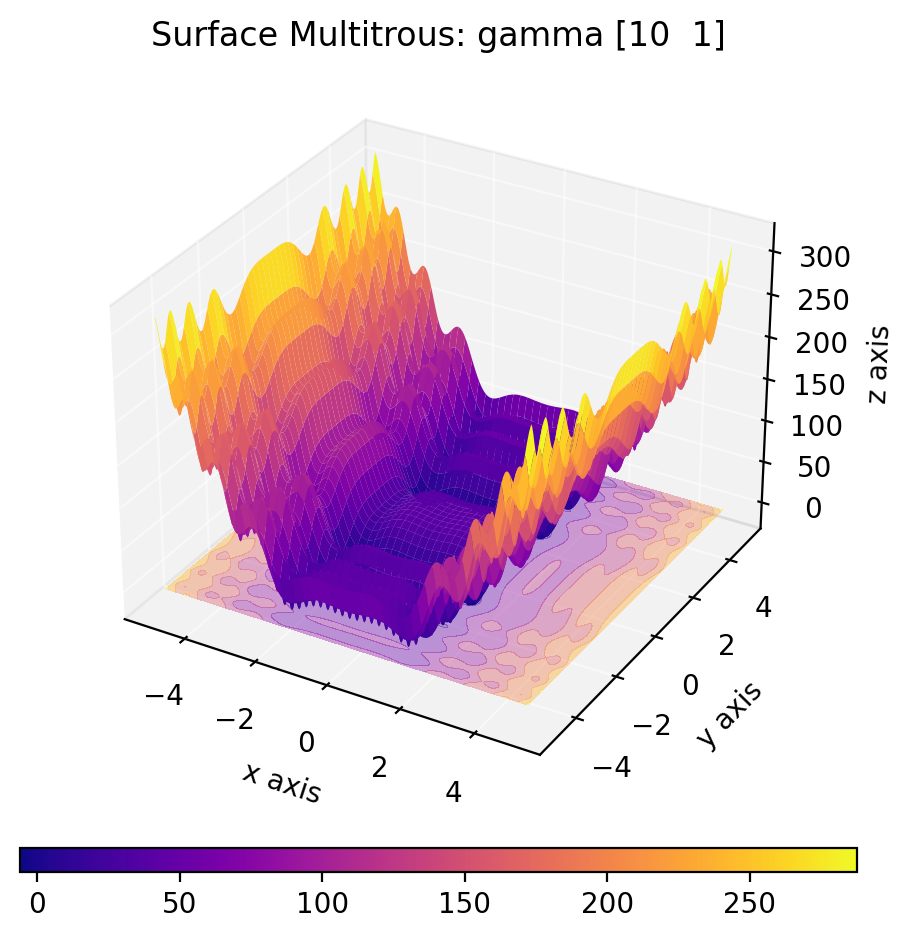

In [45]:
x = np.linspace(-5, 5, 200)
X = np.stack((x, x), axis=-1)
multitrous_3d = Multitrous3D(np.array([10, 1]))
multitrous_3d.figure(X)

# Quadratic N

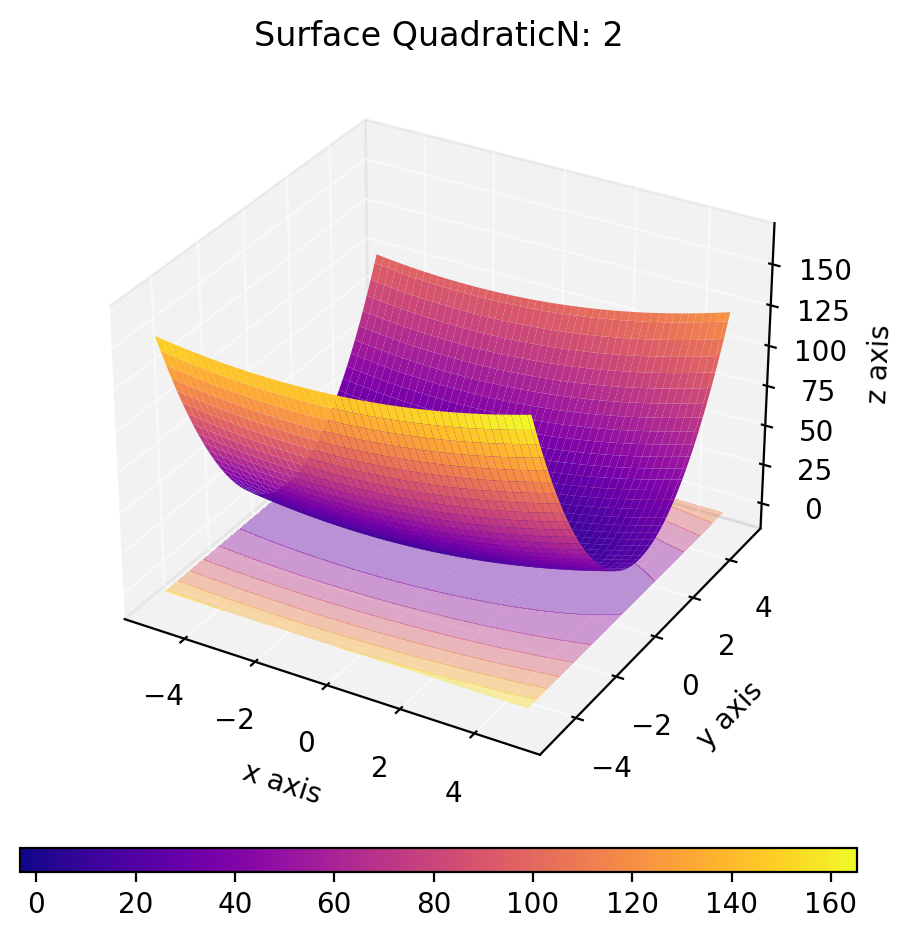

In [46]:
A, b = create_system(2)
quatratic_n = QuadraticN(A, b)
quatratic_n.figure()

# Rosenbrock

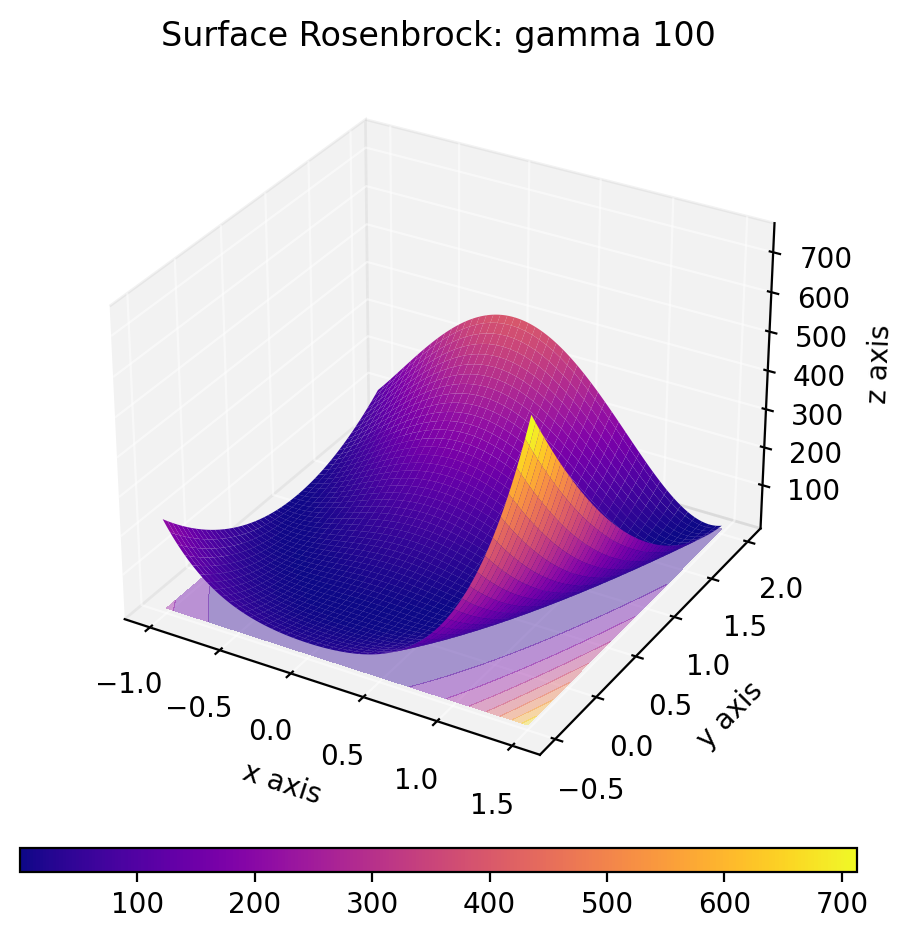

In [47]:
x, y = np.linspace(-1, 1.5, 200), np.linspace(-0.5, 2, 200)
x = np.stack((x, y), axis=-1)
rosenbrock = Rosenbrock(100)
rosenbrock.figure(x)

# Gradient descent constant step

In [48]:
x0 = np.array([0, 2])

In [49]:
mu = 0.00001

gd_constant = GradientDescentConstant()
res_gd_constant = gd_constant(rosenbrock, x0, mu)
gd_constant.get_report()

GradientDescentConstant(1e-05): Max iteration reached: 10000, the method did not converged
GradientDescentConstant(1e-05): Number of iterations: 10000 | Last Cost: 0.5020661536319694


In [50]:
gd_optimal_step = GradientDescentOptimalStep()
res_gd_optimal_step = gd_optimal_step(rosenbrock.function, x0)
gd_optimal_step.get_report()

GradientDescentOptimalStep: Number of iterations: 7040 | Last Cost: 1.908547341497862e-07


In [51]:
gd_l1_opti = GradientDescentL1Optimisation()
res_gd_l1_opti = gd_l1_opti(rosenbrock.function, x0)
gd_l1_opti.get_report()

GradientDescentL1Optimisation: Number of iterations: 4246 | Last Cost: 1.1702909717098263e-07


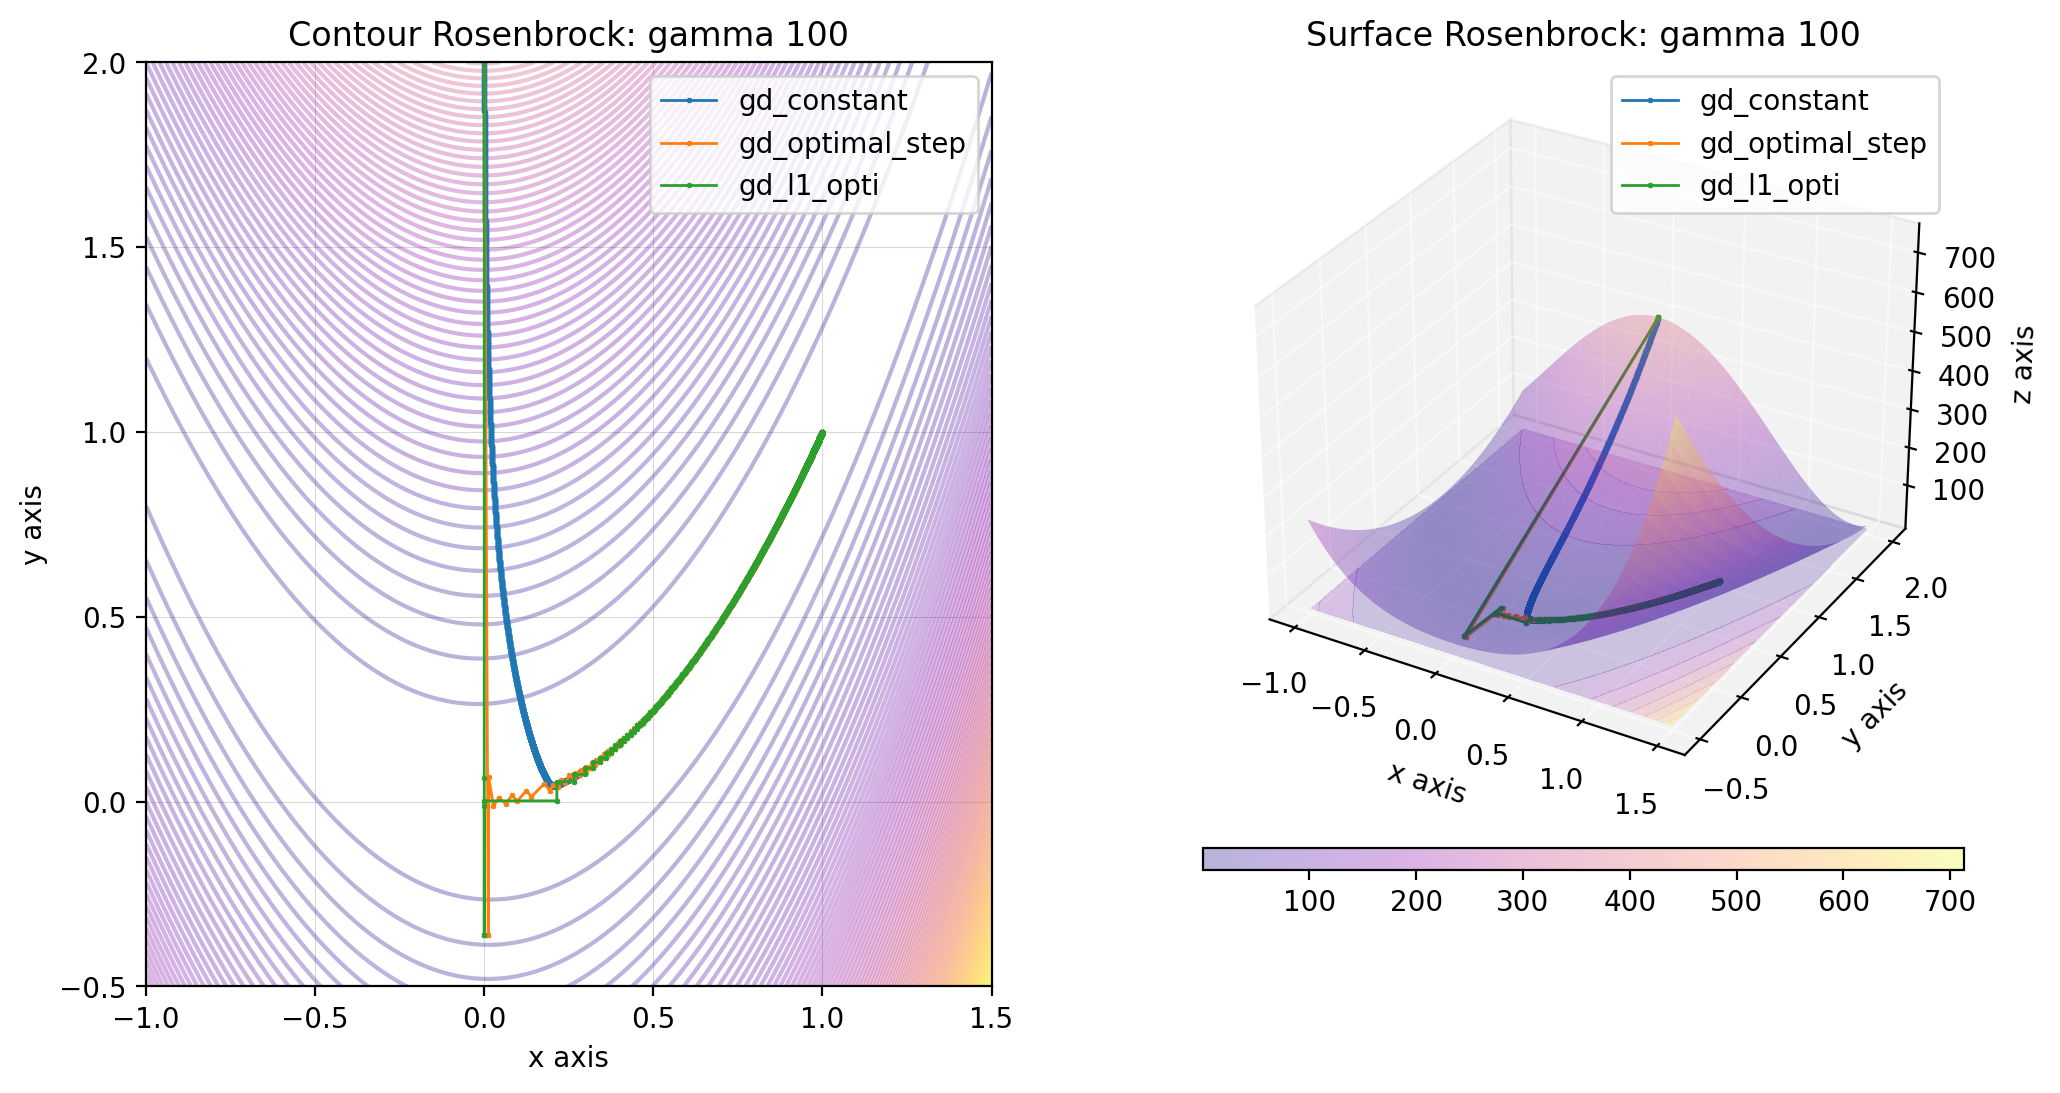

In [52]:
descents = {
    "gd_constant": res_gd_constant,
    "gd_optimal_step": res_gd_optimal_step,
    "gd_l1_opti": res_gd_l1_opti,
}

rosenbrock.figure(x, descent=descents, plot_contour=True)